# 学习 PyTorch-Day2

In [31]:
import torch
import numpy as np

device = torch.device("cuda")

## 数据集

PyTorch提供两种方式，用于加载自定义数据集
- torch.utils.data.DataLoader，将数据包装成一个可迭代的对象
- torch.utils.data.Dataset，存储模板及对应的标签

### 加载数据集

以Fashion-MNIST为例，其是一个类似于MNIST的数据集，有60000个训练集，10000个测试集，10个类别，均为28x28的灰度图

In [32]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets  # torchvision.dataset中包含大量公共数据集以供使用
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 迭代及可视化数据

- 通过 index(下标) 对数据进行索引
- 通过 matplotlib包 队数据进行可视化

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 0

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 5

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 0

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 3

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 0

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 9

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 3

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 8

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'> 3



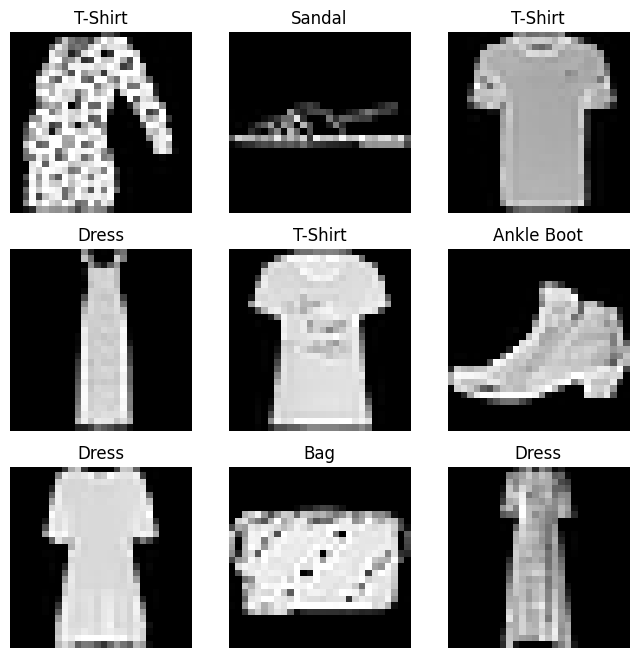

In [33]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    print(type(img),img.shape)
    print(type(label), label)
    print()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis("off")

### 为自己的数据集定制一个Dataset类[缺点：一次只能处理一个样本]

定制一个Dataset类，需要实现3个函数
- __init__
- __len__
- __getitem__

In [34]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### 使用DataLoader类包装数据[可以弥补Dataset类一次只能处理一个样本的缺点]

- 我们在实际训练过程中，通常都是将一个 __batch__ 的数据包装处理好，送入训练
- __DataLoader__ 类可以批量包装数据
- 同时使用 __multiprocessing__ 包 加速处理

In [35]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

- 迭代访问数据[会返回 __feature__ 和 __label__]

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
torch.Size([28, 28])
label:1


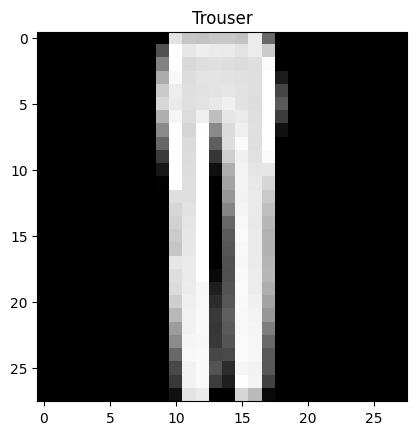

In [36]:
# 迭代访问，并展示图片及标签类别
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

print(img.shape)
print("label:{}".format(label.item()))

plt.imshow(img, cmap="gray")
plt.title(labels_map[label.item()])

plt.show()